# Election data  -Constituency Wise Summary of each state of india 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('7_Constituency_PC_Wise_Summary_0.csv')
df = df[df['PC Name'] != 'State-Total']  
df = df[df['PC Name'] != 'Total']  

print("Dataset Overview:")
df.info()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 576
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        542 non-null    object 
 1   PC No                        542 non-null    object 
 2   PC Name                      542 non-null    object 
 3   No Of AC Segments            542 non-null    int64  
 4   PS                           542 non-null    int64  
 5   Total Electors               542 non-null    int64  
 6   Avg. No. of Electors Per PS  542 non-null    int64  
 7   Nominations                  542 non-null    int64  
 8   Contestants                  542 non-null    int64  
 9   FD                           542 non-null    int64  
 10  Total Voters                 542 non-null    int64  
 11  VTR (%)                      542 non-null    float64
dtypes: float64(1), int64(8), object(3)
memory usage: 55.0+ KB


In [47]:
df.head()


,State,PC No,PC Name,No Of AC Segments,PS,Total Electors,Avg. No. of Electors Per PS,Nominations,Contestants,FD,Total Voters,VTR (%)
0,Andhra Pradesh,1,Araku,7,2052,1557153,759,23,13,11,1165787,74.87
1,Andhra Pradesh,2,Srikakulam,7,2049,1646686,804,16,13,11,1241169,75.37
2,Andhra Pradesh,3,Vizianagaram,7,1886,1590994,844,18,15,13,1307632,82.19
3,Andhra Pradesh,4,Visakhapatnam,7,1962,1931398,984,39,33,31,1391130,72.03
4,Andhra Pradesh,5,Anakapalle,7,1828,1601365,876,25,15,13,1328726,82.97


In [48]:
df.fillna(method='ffill', inplace=True) 

## filling the misiing values using forward fill method

In [49]:
df['VTR (%)'] = pd.to_numeric(df['VTR (%)'], errors='coerce')
df['Total Electors'] = pd.to_numeric(df['Total Electors'], errors='coerce')
df['PS'] = pd.to_numeric(df['PS'], errors='coerce')


## converting the values in the above columns to numeric values

Text(0, 0.5, 'Frequency')

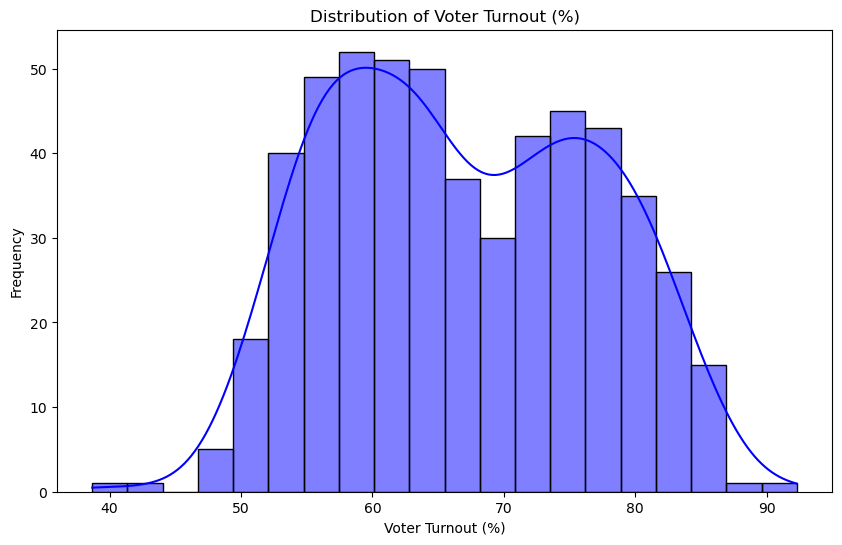

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df["VTR (%)"], bins=20, kde=True, color='blue')
plt.title("Distribution of Voter Turnout (%)")
plt.xlabel("Voter Turnout (%)")
plt.ylabel("Frequency")


## the above plot shows the frequency of voter turnout (%) among all most constituencies have between 60 to 70 %

Text(0, 0.5, 'State')

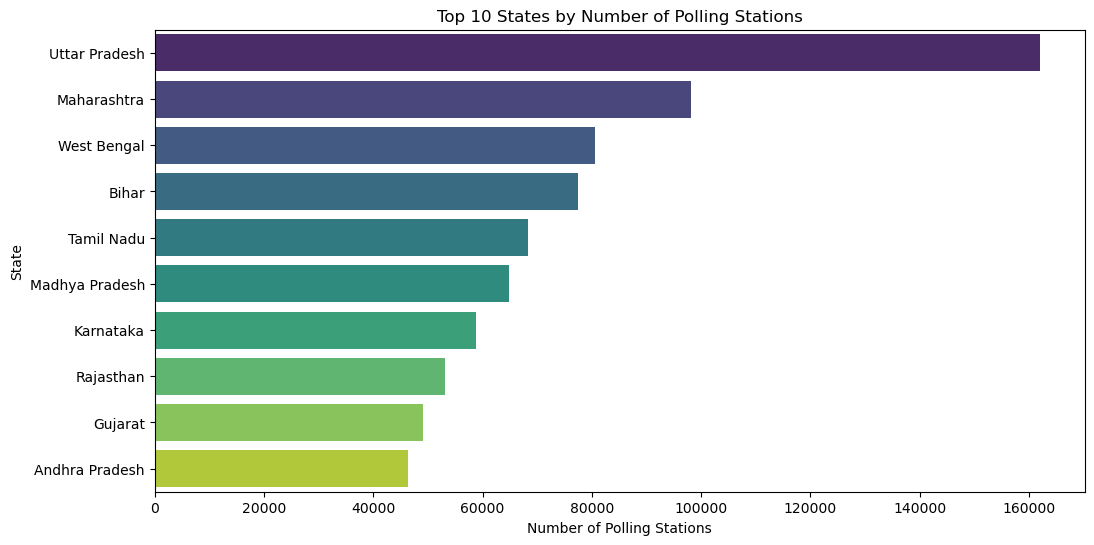

In [51]:
plt.figure(figsize=(12, 6))
top_states_ps = df.groupby("State")["PS"].sum().nlargest(10)
sns.barplot(x=top_states_ps.values, y=top_states_ps.index, palette="viridis")
plt.title("Top 10 States by Number of Polling Stations")
plt.xlabel("Number of Polling Stations")
plt.ylabel("State")


## above barplot shows the top 10 states with most number of polling stations among all the states and union territories Uttar Pradesh has most polling stations

Text(0, 0.5, 'State')

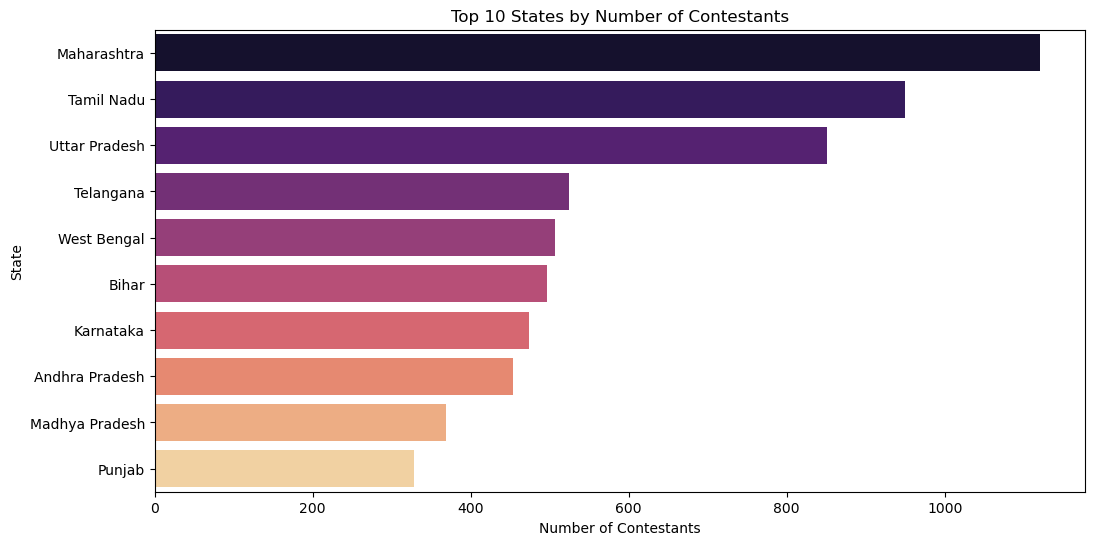

In [52]:
plt.figure(figsize=(12, 6))
top_states_contestants = df.groupby("State")["Contestants"].sum().nlargest(10)
sns.barplot(x=top_states_contestants.values, y=top_states_contestants.index, palette="magma")
plt.title("Top 10 States by Number of Contestants")
plt.xlabel("Number of Contestants")
plt.ylabel("State")


## above barplot shows the top 10 states with most number of contestants among all the states Maharastra has most poost number 

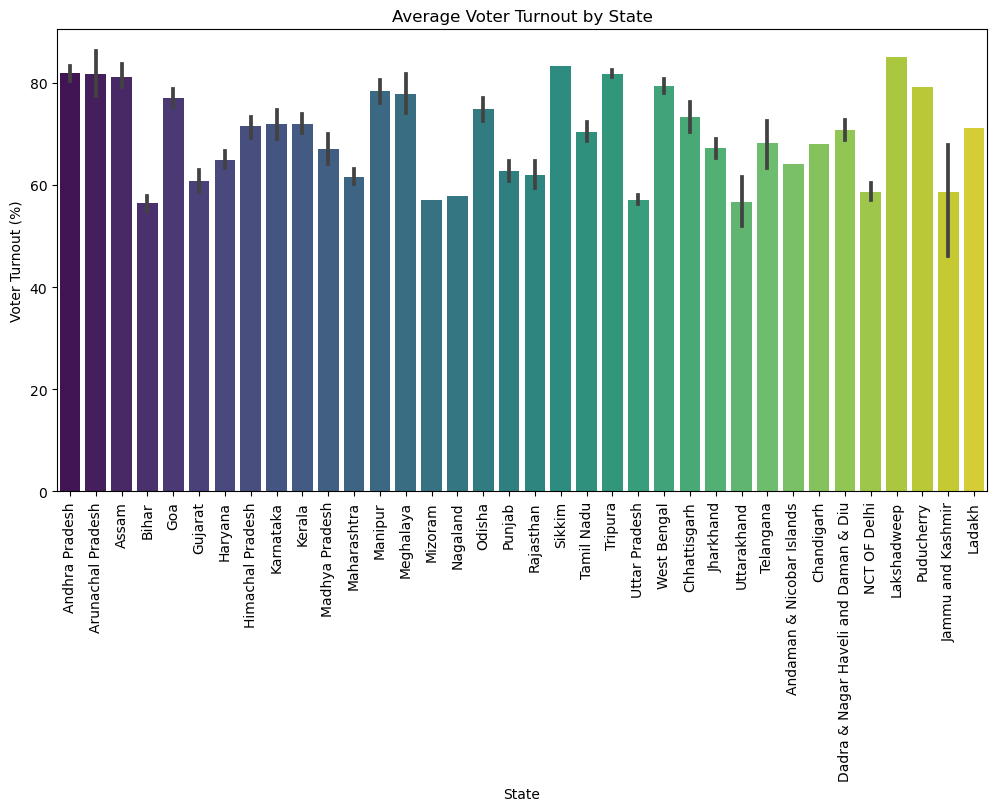

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='VTR (%)', data=df, palette='viridis', estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Voter Turnout by State')
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.show()

## the barplot shows  state wise voter turnout percentage 7 states has crossed 80% 

Text(0, 0.5, 'State')

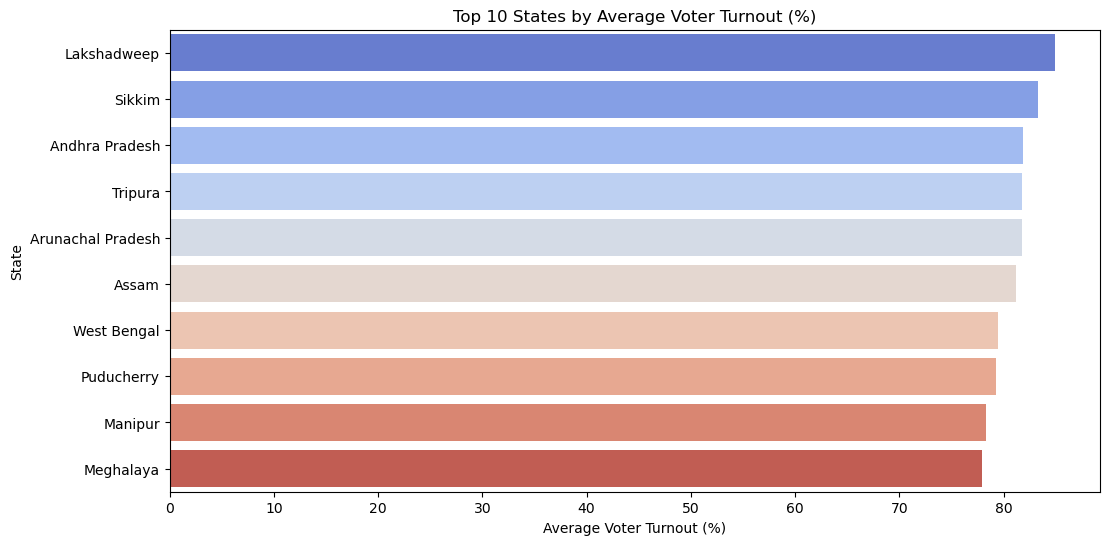

In [54]:
plt.figure(figsize=(12, 6))
top_states_vtr = df.groupby("State")["VTR (%)"].mean().nlargest(10)
sns.barplot(x=top_states_vtr.values, y=top_states_vtr.index, palette="coolwarm")
plt.title("Top 10 States by Average Voter Turnout (%)")
plt.xlabel("Average Voter Turnout (%)")
plt.ylabel("State")


Text(0, 0.5, 'State')

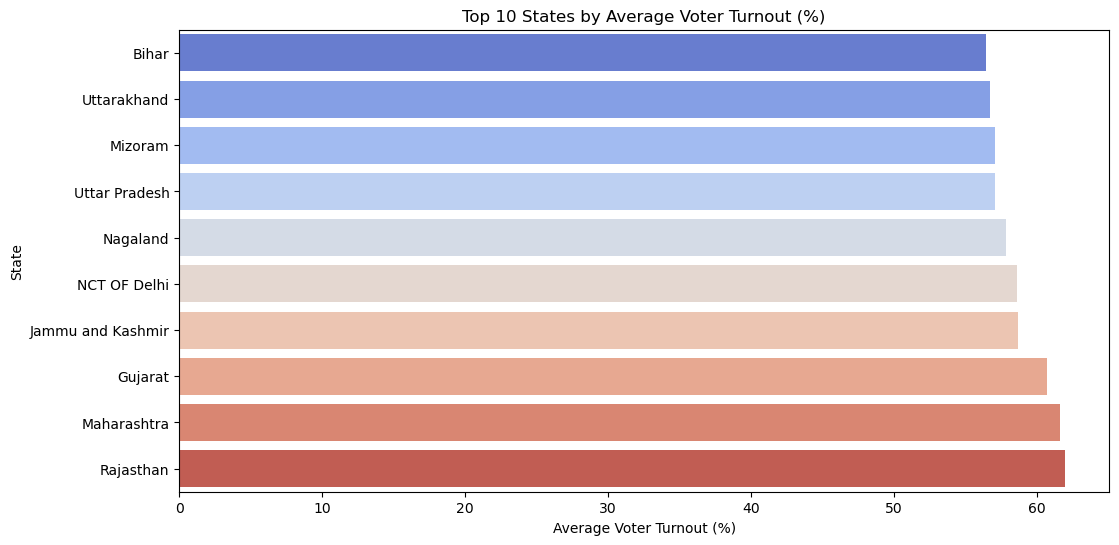

In [64]:
plt.figure(figsize=(12, 6))
bottom_states_vtr = df.groupby("State")["VTR (%)"].mean().nsmallest(10)
sns.barplot(x=bottom_states_vtr.values, y=bottom_states_vtr.index, palette="coolwarm")
plt.title("Top 10 States by Average Voter Turnout (%)")
plt.xlabel("Average Voter Turnout (%)")
plt.ylabel("State")


## the above barplot shows top 10 states with least voter turnout percentage among them bihar ranks least with below 55%

Text(0, 0.5, 'Voter Turnout (%)')

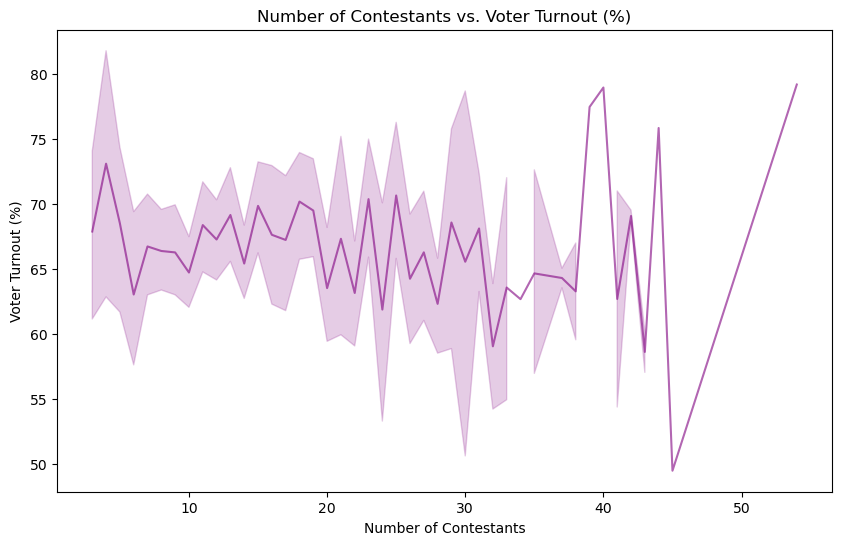

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Contestants"], y=df["VTR (%)"], alpha=0.6, color="purple")
plt.title("Number of Contestants vs. Voter Turnout (%)")
plt.xlabel("Number of Contestants")
plt.ylabel("Voter Turnout (%)")


## The line plot suggests that constituencies with a very high number of contestants tend to have slightly lower voter turnout. However, most constituencies fall within a moderate contestant range with turnout between 55% and 75%

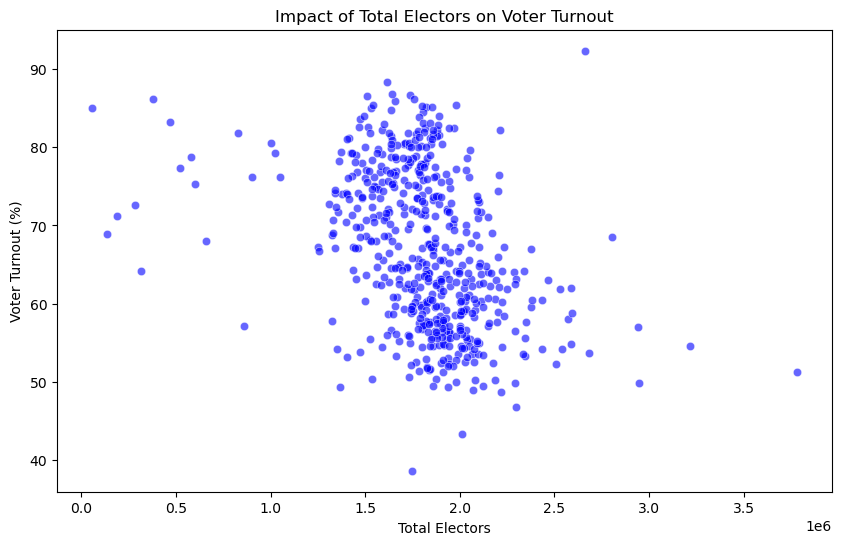

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total Electors", y="VTR (%)", data=df, alpha=0.6, color="blue")
plt.title("Impact of Total Electors on Voter Turnout")
plt.xlabel("Total Electors")
plt.ylabel("Voter Turnout (%)")
plt.show()


## The line plot indicates that voter turnout percentage remains  consistent across constituencies, regardless of the total number of electors. However, some constituencies with a very high number of electors have lower turnout

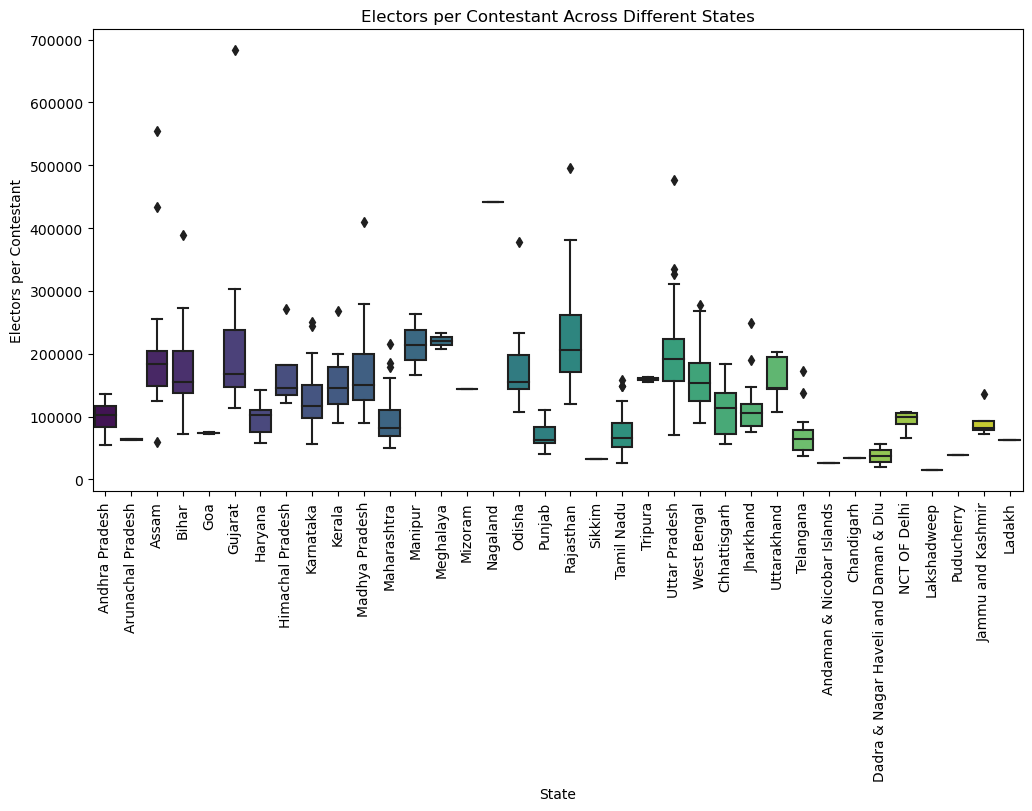

In [68]:
df["Electors per Contestant"] = df["Total Electors"] / df["Contestants"]

statewise_avg = df.groupby("State")["Electors per Contestant"].mean().sort_values()

lowest_state = statewise_avg.idxmin()
highest_state = statewise_avg.idxmax()

lowest_avg = statewise_avg.min()
highest_avg = statewise_avg.max()
overall_avg = statewise_avg.mean()
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Electors per Contestant", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Electors per Contestant Across Different States")
plt.xlabel("State")
plt.ylabel("Electors per Contestant")
plt.show()



## The state with the **lowest** electors per contestant is **Lakshadweep** with an average of **14488 electors per contestant**.
## The state with the **highest** electors per contestant is **Nagaland** with an average of 441794 electors per contestant**.
## On average, across all states, each contestant represents about **128919 electors**.

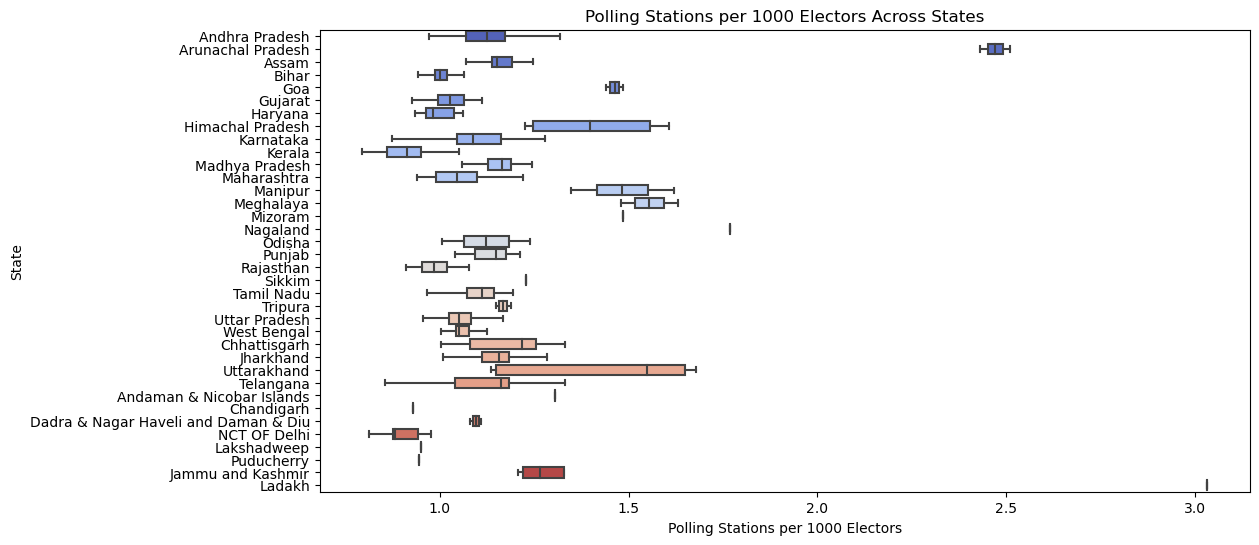

In [70]:
df["Polling Stations per 1000 Electors"] = (df["PS"] / df["Total Electors"]) * 1000
plt.figure(figsize=(12, 6))
sns.boxplot(x="Polling Stations per 1000 Electors", y="State", data=df, showfliers=False, palette="coolwarm")
plt.title("Polling Stations per 1000 Electors Across States")
plt.xlabel("Polling Stations per 1000 Electors")
plt.ylabel("State")
plt.show()


## The state with the **fewest** polling stations per 1,000 electors is **NCT OF Delhi** with an average of **0.90** polling stations per 1,000 electors.
## The state with the **most** polling stations per 1,000 electors is **Ladakh** with an average of **3.03** polling stations per 1,000 electors.
## On average, across all states, there are about **1.26** polling stations per 1,000 electors.

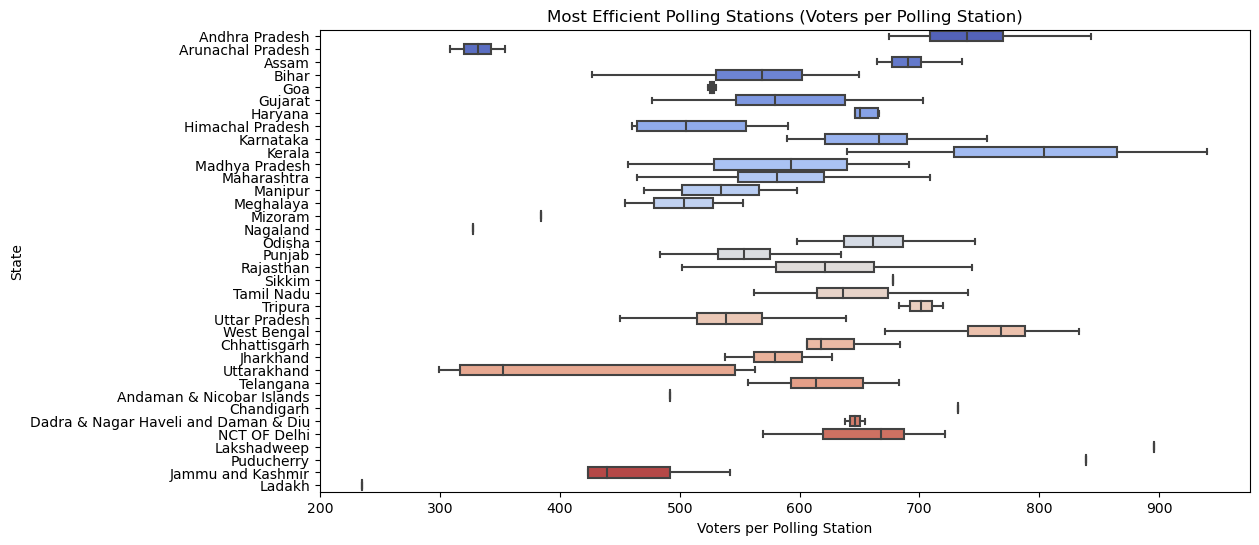

In [72]:
df["Voters per Polling Station"] = df["Total Voters"] / df["PS"]
plt.figure(figsize=(12, 6))
sns.boxplot(x="Voters per Polling Station", y="State", data=df, showfliers=False, palette="coolwarm")
plt.title("Most Efficient Polling Stations (Voters per Polling Station)")
plt.xlabel("Voters per Polling Station")
plt.ylabel("State")
plt.show()


## The state with the **least** voters per polling station is **Ladakh** with an average of **235** voters per polling station, indicating better voter distribution.
## The state with the **most** voters per polling station is **Lakshadweep** with an average of **895** voters per polling station, potentially leading to overcrowding.
## On average, across all states, each polling station serves about **592** voters.

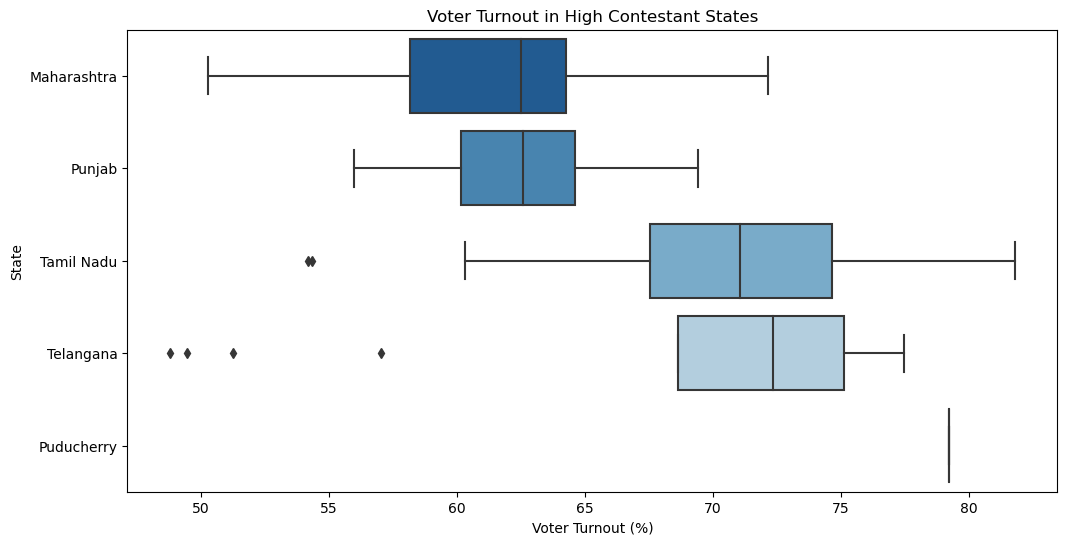

In [82]:
avg_contestants_per_state = df.groupby("State")["Contestants"].mean()

high_contestant_states = avg_contestants_per_state.nlargest(5).index

df_high = df[df["State"].isin(high_contestant_states)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="VTR (%)", y="State", data=df_high, palette="Blues_r")
plt.title("Voter Turnout in High Contestant States")
plt.xlabel("Voter Turnout (%)")
plt.ylabel("State")
plt.show()


## Among the high contestant states, Puducherry has the highest voter turnout (79.24%), while Maharashtra has the lowest (61.65%).

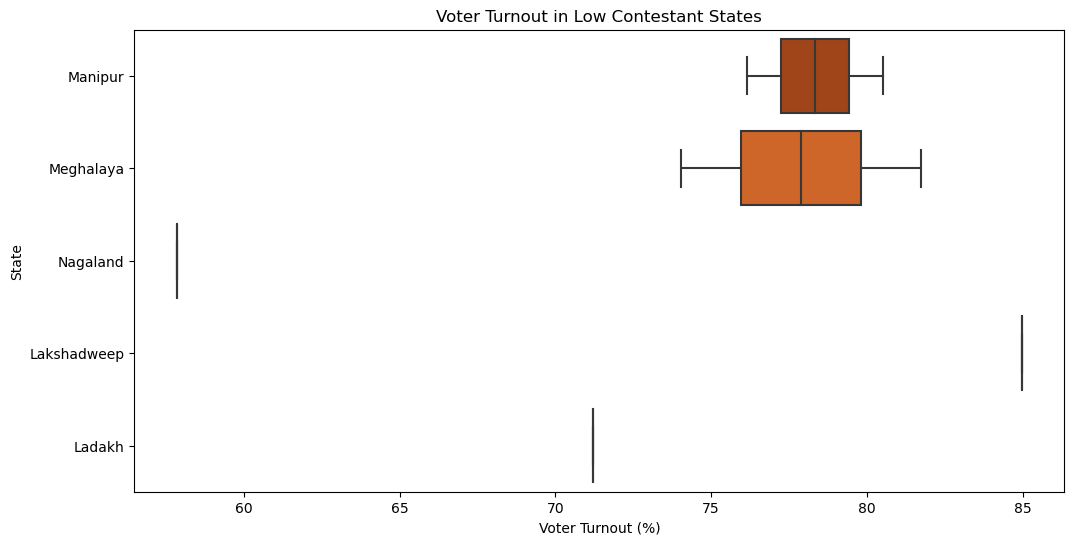

In [81]:
low_contestant_states = avg_contestants_per_state.nsmallest(5).index
df_low = df[df["State"].isin(low_contestant_states)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="VTR (%)", y="State", data=df_low, palette="Oranges_r")
plt.title("Voter Turnout in Low Contestant States")
plt.xlabel("Voter Turnout (%)")
plt.ylabel("State")
plt.show()


 
## Among the **low contestant states**, **Lakshadweep** has the highest voter turnout (**84.98%**), whereas **Nagaland** has the lowest (**57.84%**).

Text(0, 0.5, 'State')

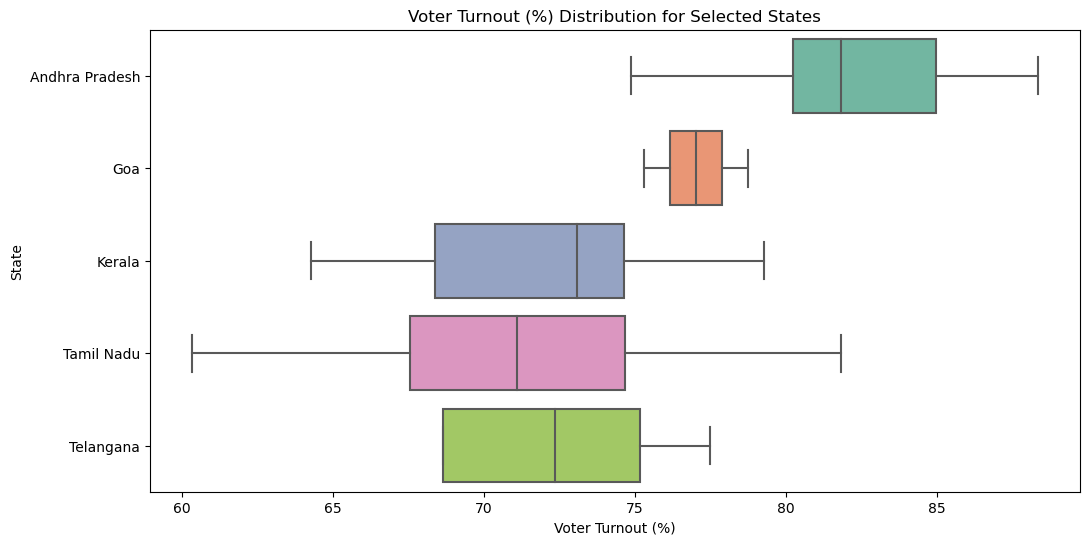

In [74]:
south_states = ["Andhra Pradesh", "Telangana", "Kerala", "Tamil Nadu", "Karnaraka","Goa"]
df_south_states = df[df["State"].isin(south_states)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="VTR (%)", y="State", data=df_south_states, palette="Set2", showfliers=False)
plt.title("Voter Turnout (%) Distribution for Selected States")
plt.xlabel("Voter Turnout (%)")
plt.ylabel("State")


## Kerala has the highest voter turnout, showing strong political engagement. Telangana and Goa seem to have lower participation. Tamil Nadu, Karnataka, and Andhra Pradesh show steady turnout

Text(0, 0.5, 'State')

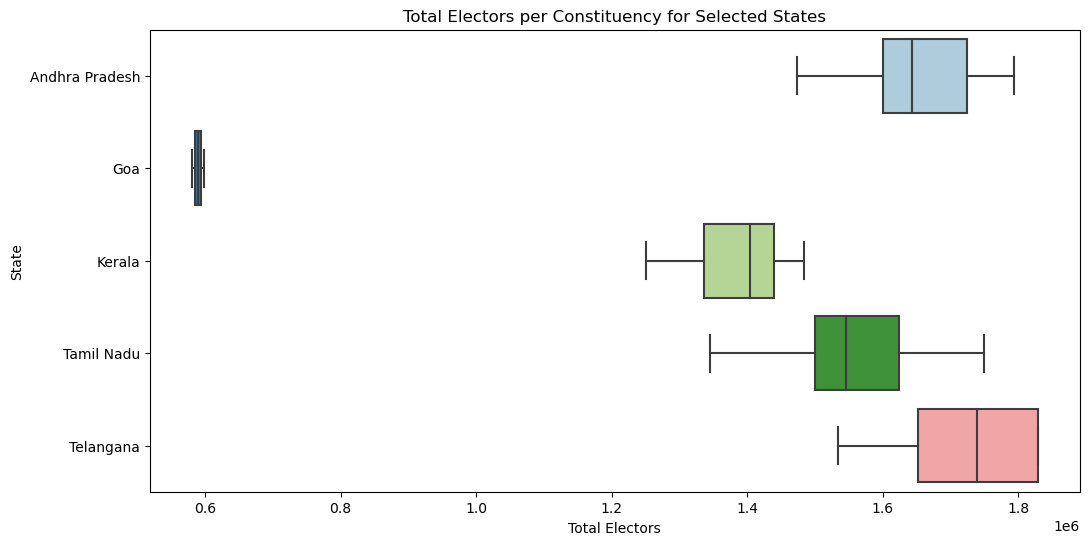

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Total Electors", y="State", data=df_south_states, palette="Paired", showfliers=False)
plt.title("Total Electors per Constituency for Selected States")
plt.xlabel("Total Electors")
plt.ylabel("State")


## Tamil Nadu and Andhra Pradesh likely have the highest elector counts, while Goa has the lowest. Kerala and Telangana show moderate elector numbers

Text(0, 0.5, 'State')

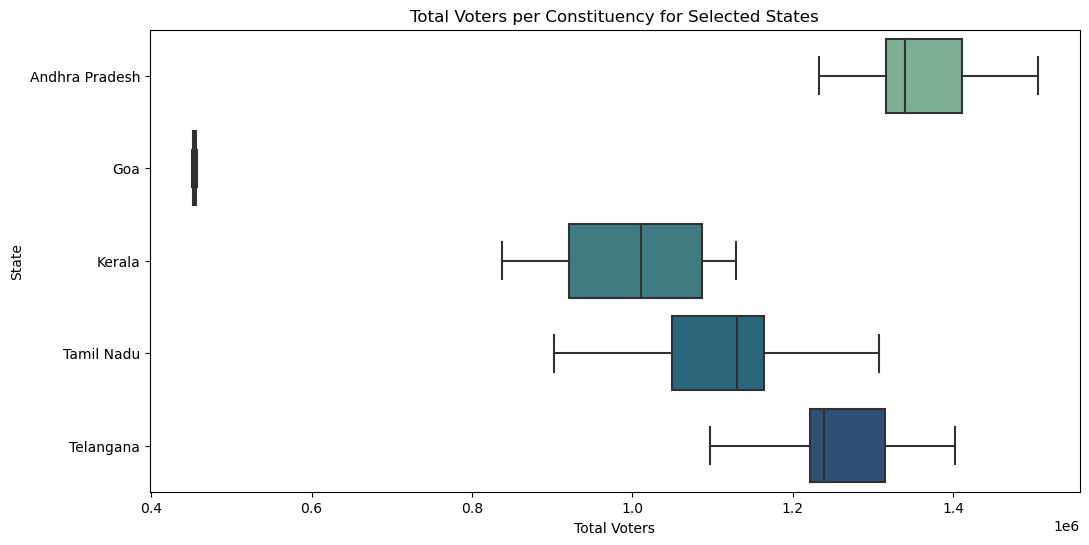

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Total Voters", y="State", data=df_south_states, palette="crest", showfliers=False)
plt.title("Total Voters per Constituency for Selected States")
plt.xlabel("Total Voters")
plt.ylabel("State")


 ## Larger states like Tamil Nadu and Andhra Pradesh likely have higher total voter counts, while smaller states like Goa have  lower numbers. 

Text(0, 0.5, 'State')

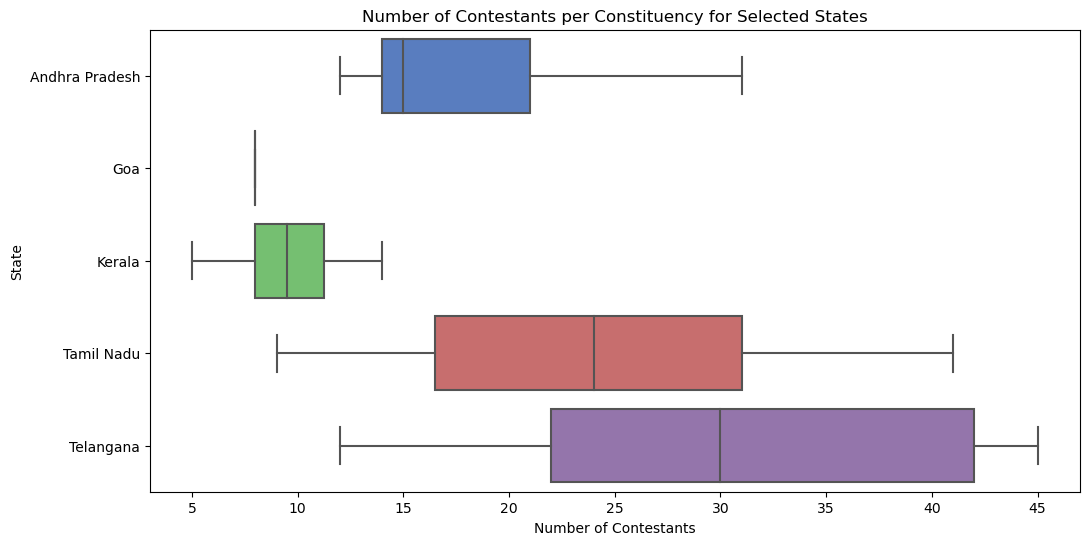

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Contestants", y="State", data=df_south_states, palette="muted", showfliers=False)
plt.title("Number of Contestants per Constituency for Selected States")
plt.xlabel("Number of Contestants")
plt.ylabel("State")


## Some states, like Tamil Nadu and Andhra Pradesh, may see a higher number of contestants, leading to vote fragmentation. Kerala and Goa might have fewer candidates, 

Text(0, 0.5, 'State')

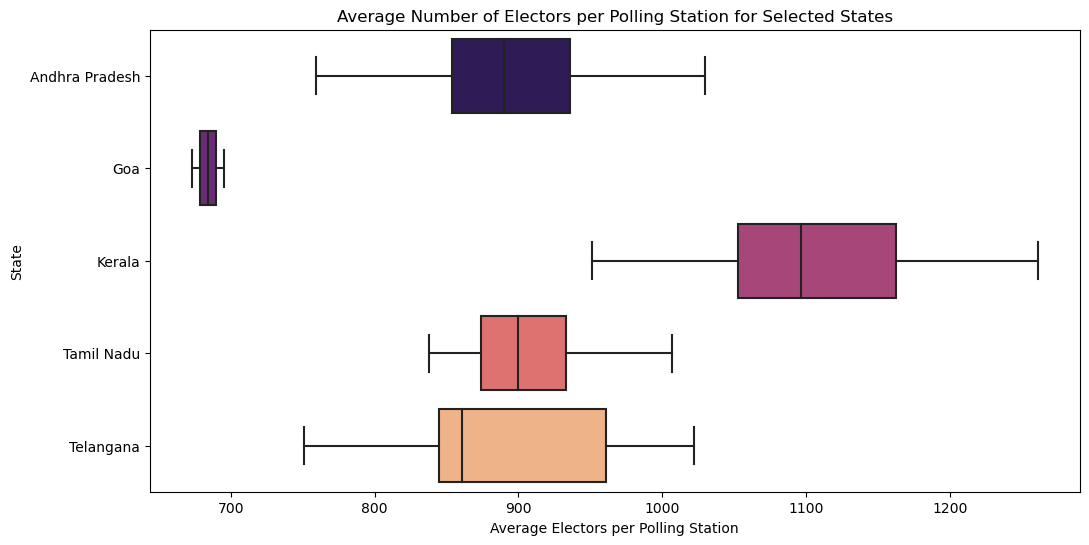

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Avg. No. of Electors Per PS", y="State", data=df_south_states, palette="magma", showfliers=False)
plt.title("Average Number of Electors per Polling Station for Selected States")
plt.xlabel("Average Electors per Polling Station")
plt.ylabel("State")


## Tamil Nadu and Andhra Pradesh likely have higher elector counts per polling station, while Kerala and Goa may have fewer.

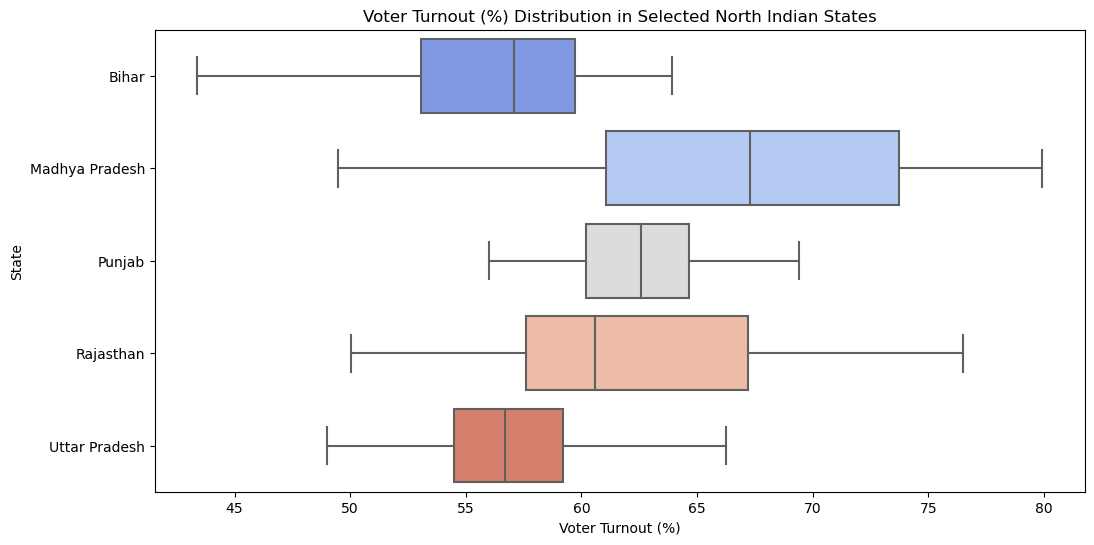

In [94]:
north_states = ["Uttar Pradesh", "Bihar", "Madhya Pradesh", "Rajasthan", "Punjab"]
df_north_states = df[df["State"].isin(north_states)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="VTR (%)", y="State", data=df_north_states, palette="coolwarm", showfliers=False)
plt.title("Voter Turnout (%) Distribution in Selected North Indian States")
plt.xlabel("Voter Turnout (%)")
plt.ylabel("State")
plt.show()


## Punjab shows relatively higher voter turnout, while Bihar and Uttar Pradesh have lower participation

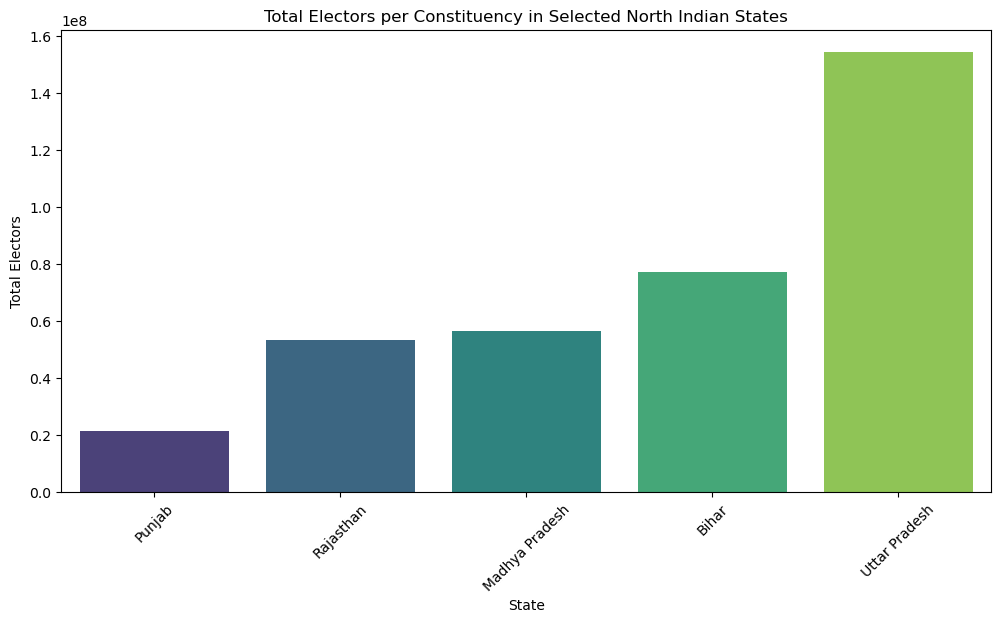

In [92]:
electors_per_state = df_north_states.groupby("State")["Total Electors"].sum().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=electors_per_state.index, y=electors_per_state.values, palette="viridis")
plt.title("Total Electors per Constituency in Selected North Indian States")
plt.xlabel("State")
plt.ylabel("Total Electors")
plt.xticks(rotation=45)
plt.show()


## Uttar Pradesh and Bihar have the highest elector counts, while Punjab and Rajasthan have fewer, indicating differences in constituency sizes

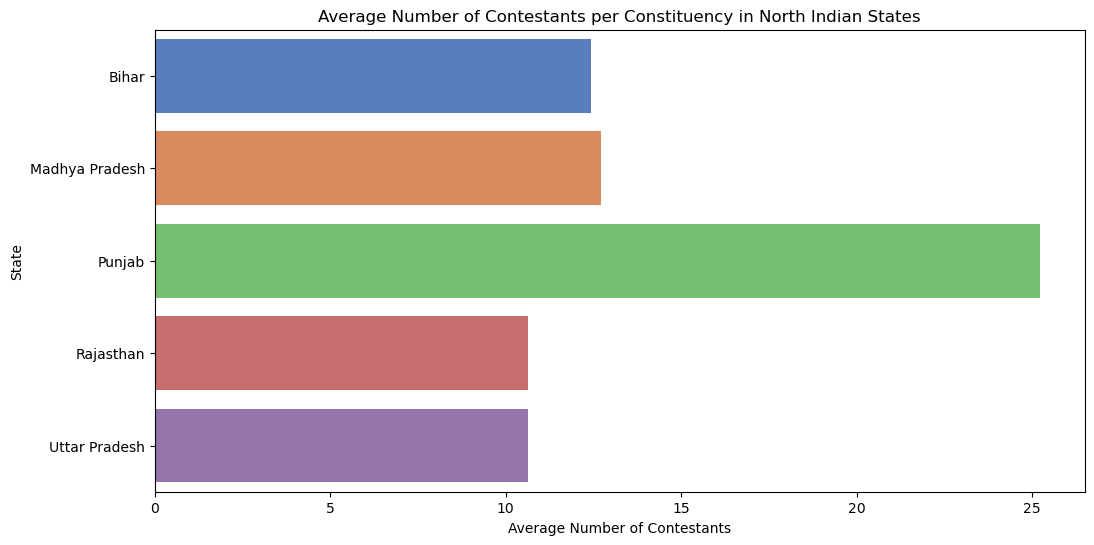

In [100]:
plt.figure(figsize=(12, 6))
avg_contestants_per_state = df_north_states.groupby("State")["Contestants"].mean().reset_index()
sns.barplot(x="Contestants", y="State", data=avg_contestants_per_state, palette="muted")
plt.title("Average Number of Contestants per Constituency in North Indian States")
plt.xlabel("Average Number of Contestants")
plt.ylabel("State")
plt.show()


## Uttar Pradesh and Bihar have the highest number of contestants per constituency, making elections more competitive, while Punjab has the fewest candidates.

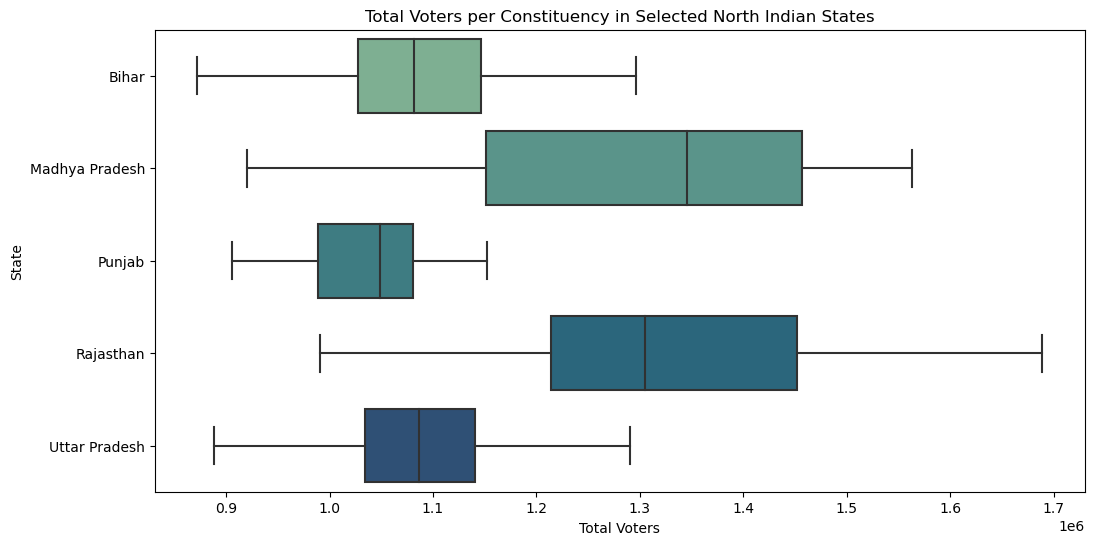

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Total Voters", y="State", data=df_north_states, palette="crest", showfliers=False)
plt.title("Total Voters per Constituency in Selected North Indian States")
plt.xlabel("Total Voters")
plt.ylabel("State")
plt.show()


## Uttar Pradesh and Bihar have the highest number of voters per constituency, while Punjab has the lowest, reflecting population differences across states.